In [23]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [24]:
data = pd.read_csv('test2.csv', delimiter=',')

#data = pd.read_csv('bank.csv', delimiter=';')

x = data[['x1', 'x2']].values
y = data['y1'].values

#x = data[['age', 'balance']].values
#y = data['housing'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging

In [25]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200, random_state=42)
bagging.fit(x_train, y_train)

c:\Users\dong5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=42)

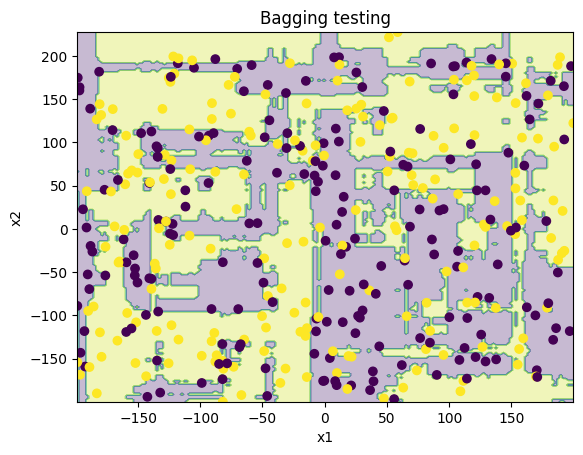

In [26]:
x2, y2 = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 200), np.linspace(x[:, 1].min(), x[:, 1].max(), 200))

z = bagging.predict(np.c_[x2.ravel(), y2.ravel()])
z = z.reshape(x2.shape)

plt.contourf(x2, y2, z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bagging testing')
plt.show()

# Boosting

# Stacking